In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import itertools

In [49]:
p=Path("dataset-resized")
dirs=p.glob("*")
image_data=[]
labels=[]

image_path=[]  #Optional

label_dict={"cardboard":0,
           "glass":1,
           "metal":2,
           "paper":3,
           "plastic":4,
           "trash":5}
label2gar={0:"cardboard",
               1:"glass",
               2:"metal",
               3:"paper",
               4:"plastic",
               5:"trash"}


for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1]
    
    #print(label)
    cnt=0
    #print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        #print(img_path)
        img=image.load_img(img_path,target_size=(224,224))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
        
    print(cnt)

403
501
410
594
482
137


In [50]:
X=np.array(image_data)
X=X/255.0
Y=np.array(labels)
print(X.shape,Y.shape)

(2527, 224, 224, 3) (2527,)


In [51]:
def drw_img(X,label):
    plt.title(label2gar[label])
    plt.axis("off")
    plt.imshow(X)

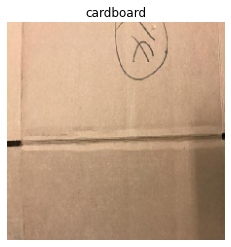

In [52]:
drw_img(X[0],Y[0])

In [53]:
print(Y)
from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)
print(Y)

[0 0 0 ... 5 5 5]
[3 2 2 ... 5 4 3]


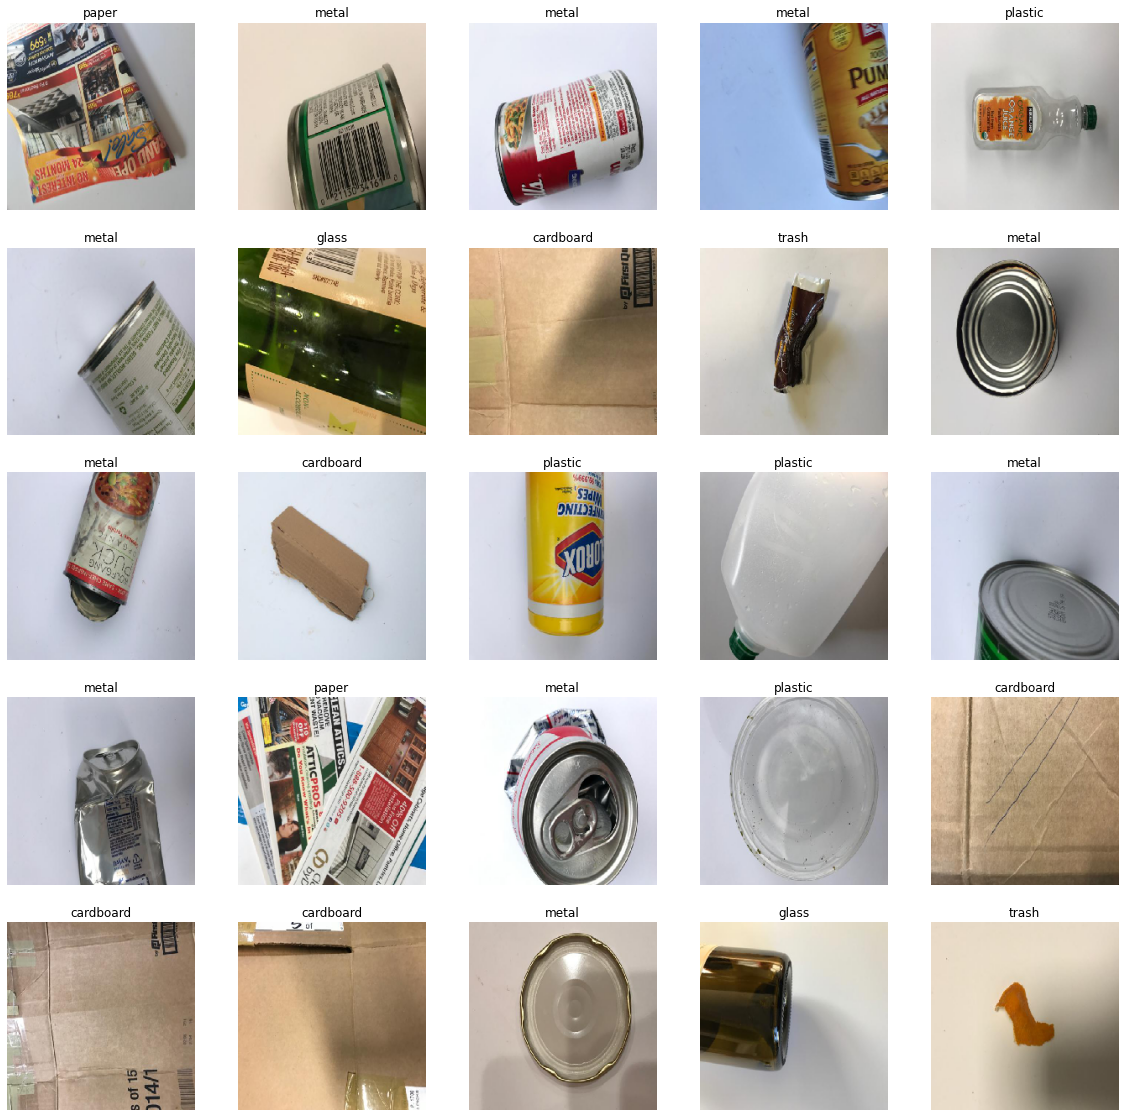

In [54]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    drw_img(X[i],Y[i])

In [55]:
X_=np.array(X)
Y_=np.array(Y)

Y_=np_utils.to_categorical(Y_)
print(X_.shape,Y_.shape)

split=int((0.8)*X_.shape[0])
print(split)

X_train=X_[:split,:]
Y_train=Y_[:split,:]

X_test=X_[split:,:]
Y_test=Y_[split:,:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2527, 224, 224, 3) (2527, 6)
2021
(2021, 224, 224, 3) (2021, 6)
(506, 224, 224, 3) (506, 6)


In [46]:
model=Sequential()
model.add(Convolution2D(32,(1,1),activation='relu',input_shape=(224,224,3)))
model.add(Convolution2D(64,(2,2),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(128,(4,4),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(256,(1,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 40, 40, 32)        128       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 39, 39, 64)        8256      
_________________________________________________________________
dropout_26 (Dropout)         (None, 39, 39, 64)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 5, 5, 128)       

In [47]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [48]:
hist=model.fit(
        X_train,
        Y_train,
        epochs=60,
        shuffle=True,
        batch_size=16,
        validation_split=0.20,
)

Epoch 1/60
101/101 [==============================] - 8s 79ms/step - loss: 1.7727 - accuracy: 0.2048 - val_loss: 1.7416 - val_accuracy: 0.2667
Epoch 2/60
101/101 [==============================] - 6s 56ms/step - loss: 1.7551 - accuracy: 0.2141 - val_loss: 1.7576 - val_accuracy: 0.2667
Epoch 3/60
101/101 [==============================] - 6s 57ms/step - loss: 1.7460 - accuracy: 0.2129 - val_loss: 1.7167 - val_accuracy: 0.2667
Epoch 4/60
101/101 [==============================] - 6s 60ms/step - loss: 1.7390 - accuracy: 0.2061 - val_loss: 1.7571 - val_accuracy: 0.2519
Epoch 5/60
101/101 [==============================] - 6s 60ms/step - loss: 1.6722 - accuracy: 0.2698 - val_loss: 1.5956 - val_accuracy: 0.3580
Epoch 6/60
101/101 [==============================] - 6s 63ms/step - loss: 1.7093 - accuracy: 0.2314 - val_loss: 1.7279 - val_accuracy: 0.2494
Epoch 7/60
101/101 [==============================] - 7s 73ms/step - loss: 1.6708 - accuracy: 0.2840 - val_loss: 1.5936 - val_accuracy: 0.3358

Epoch 58/60
101/101 [==============================] - 9s 89ms/step - loss: 0.7702 - accuracy: 0.6993 - val_loss: 2.5002 - val_accuracy: 0.5802
Epoch 59/60
101/101 [==============================] - 10s 102ms/step - loss: 0.7713 - accuracy: 0.6881 - val_loss: 2.7227 - val_accuracy: 0.5383
Epoch 60/60
101/101 [==============================] - 12s 121ms/step - loss: 0.8718 - accuracy: 0.6726 - val_loss: 1.9127 - val_accuracy: 0.5778


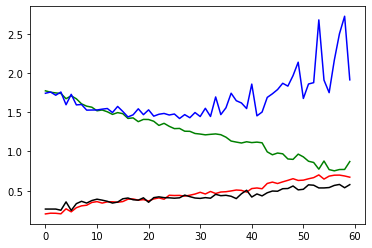

In [56]:
plt.figure(0)
plt.plot(hist.history['loss'],'green')
plt.plot(hist.history['val_loss'],'blue')
plt.plot(hist.history['accuracy'],'red')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [58]:
Y_pred=model.predict(X_test)
Y_pred=np.argmax(Y_pred,axis=1)  #get max from each row
print(Y_pred)
actual_Y_label=np.argmax(Y_test,axis=1)

class_name=["cardboard","glass","metal","paper","plastic","trash"]
cls_report=classification_report(actual_Y_label,Y_pred,target_names=class_name)
print(cls_report)

ValueError: in user code:

    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\91741\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_33 is incompatible with the layer: expected axis -1 of input shape to have value 256 but received input with shape [None, 36864]


In [ ]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
cnf_matrix=confusion_matrix(actual_Y_label,Y_pred,labels=[0,1,2,3,4,5])
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix,target_names=class_name,normalize=False)

Predict metal but actual  is plastic
Predict metal but actual  is cardboard
Predict paper but actual  is metal
Predict metal but actual  is cardboard
Predict cardboard but actual  is paper
Predict metal but actual  is glass
Predict metal but actual  is glass
Predict metal but actual  is paper
Predict metal but actual  is paper
Predict glass but actual  is cardboard
Predict plastic but actual  is glass
Predict plastic but actual  is glass
Predict glass but actual  is metal
Predict paper but actual  is cardboard
Predict glass but actual  is paper
Predict plastic but actual  is paper
Predict cardboard but actual  is trash
Predict glass but actual  is cardboard
Predict paper but actual  is glass
Predict plastic but actual  is metal
Predict metal but actual  is glass
Predict paper but actual  is metal
Predict metal but actual  is cardboard
Predict cardboard but actual  is paper
Predict metal but actual  is glass
Predict metal but actual  is paper
Predict paper but actual  is plastic
Predict

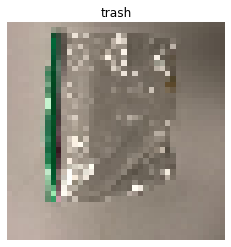

In [20]:
for i in range(Y_test.shape[0]):
    if Y_pred[i]!=actual_Y_label[i]:
        print("Predict %s but actual  is %s"%(label2gar[Y_pred[i]],label2gar[actual_Y_label[i]]))
        drw_img(X_test[i].reshape(40,40,3),actual_Y_label[i])

In [21]:
def predict_image(image_path):
    img=image.load_img(image_path,target_size=(40,40))
    img_array=image.img_to_array(img)
    img_array=np.array(img_array)
    img_array=img_array.reshape(40,40,3)
    prob=model.predict(img_array.reshape(-1,40,40,3))
    prob=np.array(prob)
    print(label2gar[np.argmax(prob)])

In [22]:
model_json = model.to_json()
with open("modelg.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("modelg.h5")